![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)
This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Diminuindo o erro: a fórmula do valor médio e a fórmula dos trapézios

Vimos que o erro ao considerar somas de Riemann (na verdade, deveríamos chamar de "somas de Cauchy" estas que usam o ponto inicial)
tende a zero porque a oscilação da função diminui conforme o tamanho do intervalo considerado diminui.
Será que é possível (analogamente às diferenças centrais) obter fórmulas que convirjam mais rápido?

Em geral (ou seja, para funções apenas contínuas) isso não é possível,
pois a oscilação $\omega$ é o único mecanismo de controle que possuímos.
Mas, seguindo o princípio geral do curso, "mais derivadas = melhor convergência",
então vamos procurar métodos que nos dêem erros menores se supusermos que a função seja derivável.

Começamos com funções uma vez deriváveis.

## Erro, com derivadas

A primeira coisa a ser feita é estimar o erro da fórmula que já temos, supondo que $f$ seja derivável.
Começamos com as somas de Cauchy, onde $x_k = c_k$:
$$\begin{align}
e _ {n,k} & = h \cdot \left| f(c_k) - \int_0^1 f(c_k + th) \, dt \right|
     = h \cdot \left| \int_0^1 \big[ f(c_k) - f(c_k + th) \big] \, dt \right| \\
   & = h \cdot \left| \int_0^1 f'(\xi_t)(-th) \, dt \right|
     = h^2 \cdot \left| \int_0^1 f'(\xi_t) t \, dt \right| \\
   & \leq h^2 \cdot \int_0^1 \max \bigl| f'(\xi) \bigr| t \, dt
     =    h^2 \cdot \max \bigl| f'(\xi) \bigr| \cdot \int_0^1 t \, dt
     =    h^2 \cdot \max \bigl| f'(\xi) \bigr| \cdot \frac{1}{2}
\end{align}$$
onde usamos a fórmula do valor médio para derivada: $f(y) - f(x) = f'(\xi)(y - x)$ para algum $\xi \in (x,y)$.

Ao somar todos os $e _ {n,k}$, teremos então que o erro $E_n$ será, no máximo,
$$
\def\maxhalf{\frac{\max \bigl| f'(\xi) \bigr|}{2}}
E_n
  \leq \sum _ {k=0}^{n-1} e _ {n,k}
  \leq n \cdot h^2 \maxhalf
  \leq h \cdot (b - a) \maxhalf.
$$
Assim, o erro da "fórmula de Cauchy" decresce linearmente com $h$.

Obs: podemos obter esta estimativa da estimativa anterior e a seguinte relação:
a oscilação de $f$ num intervalo é sempre menor do que o máximo do valor absoluto da derivada $f'$
neste mesmo intervalo, vezes o comprimento do intervalo.

## Como diminuir o erro?

Para reduzir o erro, podemos apostar em duas vertentes.
Ou fazemos os erros $e _ {n,k}$ se compensarem, ou reduzimos os $e _ {n,k}$ diretamente.
A primeira estratégia depende muito da função considerada, então vamos tentar arrumar um outro método.
Em suma, gostaríamos de reduzir o erro
$$\big(\text{Estimativa da integral de $f$ no intervalo $[c_k, d_k]$}\big) - \int_{c_k}^{d_k} f(u) \, du.$$

Inspirados pela fórmula das diferenças centrais, podemos pensar que, se calcularmos $f$ no meio do intervalo,
em vez de no bordo, o erro pode ser menor.
Ou seja, usaremos $f\left(\frac{c_k + d_k}{2}\right)$ em vez de $f(c_k)$ como estimativa de $f$.
Assim, em vez de calcularmos $S_n$, calcularemos
$$M_n = \sum_{k=0}^{n-1} f \left(\frac{c_k + d_k}{2} \right) \cdot h.$$
Esta fórmula é conhecida como **fórmula do ponto médio**.

### Exercício:

- Implemente a fórmula do ponto médio.
- Refaça os gráficos para as funções seno e gaussiana.

In [2]:
def midpoint(f,a,b,n=100):
    """Calcula uma aproximação da integral de $f$ no intervalo $[a,b]$, com $n$ pontos pela fórmula do ponto médio."""
    ### Resposta aqui


In [3]:
# Use esta caixa para calcular os erros
def f(x): return np.sin(x)
def g(x): return np.exp(-x**2)

# Sugestão de valores de $n$ para usar
ns = np.array([int(x) for x in np.logspace(1,4)])
### Resposta aqui


In [4]:
def glinha(x):
    return -2*x*np.exp(-x**2)
K_g = abs(glinha(np.pi) - glinha(0))

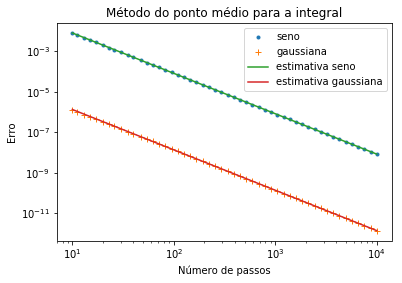

In [5]:
plt.loglog(ns, abs(F_m - true_F), '.', label='seno')
plt.loglog(ns, abs(G_m - true_G), '+', label='gaussiana')
plt.loglog(ns, np.pi**2/(24*ns**2)*2, label='estimativa seno')
plt.loglog(ns, np.pi**2/(24*ns**2)*K_g, label='estimativa gaussiana')
plt.xlabel('Número de passos')
plt.ylabel('Erro')
plt.title('Método do ponto médio para a integral')
plt.legend(loc=0)
plt.show()

### Exercício: estimativa do erro

- Suponha que $f$ seja **duas** vezes diferenciável, e estime o erro cometido pela fórmula do ponto médio.
  Para aproveitar a simetria ao máximo, introduza $m_k = \frac{c_k + d_k}{2}$
  e faça uma mudança de variáveis para o intervalo $[-1,1]$ (em vez de $[0,1]$, que não é simétrico!).

Dê sua resposta aqui
